In [1]:
# CELL 1: imports and output folders
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting defaults
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Base project folder - change if your path is different
BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"
OUT = os.path.join(BASE, "outputs")
FIG = os.path.join(OUT, "figures")
os.makedirs(FIG, exist_ok=True)

print("Output folder:", OUT)
print("Figures folder:", FIG)


Output folder: C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs
Figures folder: C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs\figures


In [2]:
# CELL 2: load the CSV
DATA = os.path.join(BASE, "index data set.csv")   # adjust filename if different
df = pd.read_csv(DATA)

# quick info
print("Rows,Cols:", df.shape)
display(df.head())


Rows,Cols: (1133, 6)


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
# CELL 3: date parsing and basic cleanup
# Replace 'Date' below with actual date column name if different
date_col = None
for c in df.columns:
    if 'date' in c.lower():
        date_col = c
        break

print("Detected date column:", date_col)

if date_col:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True)
    df = df.sort_values(date_col).reset_index(drop=True)
    df = df.dropna(subset=[date_col])
    df.rename(columns={date_col: 'Date'}, inplace=True)
else:
    print("No date column detected. If data is time series, please tell me the date column name.")

# Basic summary
display(df.info())
display(df.describe(include='all').T)


Detected date column: date
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   object        
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 53.2+ KB


C:\Users\amins\AppData\Local\Temp\ipykernel_17328\919823693.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce', infer_datetime_format=True)


None

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,1133,NaN,NaN,NaN,2024-05-19 11:36:29.232127232,2024-03-01 00:00:00,2024-04-14 00:00:00,2024-05-23 00:00:00,2024-06-22 00:00:00,2024-07-31 00:00:00,NaN
datetime,1133,1133,2024-07-31 21:55:16.570,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cash_type,1133,2,card,1044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card,1044,446,ANON-0000-0000-0012,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
money,1133.0,NaN,NaN,NaN,33.105808,18.12,28.9,32.82,37.72,40.0,5.035366
coffee_name,1133,8,Americano with Milk,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# CELL 4: detect main numeric column (sales/close)
num_col = None
candidates = ['close','sales','value','price','amount']
for c in df.columns:
    if c.lower() in candidates:
        num_col = c
        break

if num_col is None:
    # fallback: choose the first numeric column other than Date
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    numeric_cols = [c for c in numeric_cols if c != 'Date']
    num_col = numeric_cols[0] if numeric_cols else None

print("Using numeric column:", num_col)
df.rename(columns={num_col: 'Value'}, inplace=True)

# compute daily returns or pct change
df['Return'] = df['Value'].pct_change()

# Simple moving averages if time series frequency allows
df['SMA_7'] = df['Value'].rolling(window=7, min_periods=1).mean()
df['SMA_30'] = df['Value'].rolling(window=30, min_periods=1).mean()

display(df[['Date','Value','Return','SMA_7','SMA_30']].head(10))


Using numeric column: money


,Date,Value,Return,SMA_7,SMA_30
0,2024-03-01,38.7,NaN,38.70,38.700000
1,2024-03-01,38.7,0.000000,38.70,38.700000
2,2024-03-01,38.7,0.000000,38.70,38.700000
3,2024-03-01,28.9,-0.253230,36.25,36.250000
4,2024-03-01,38.7,0.339100,36.74,36.740000
5,2024-03-01,33.8,-0.126615,36.25,36.250000
6,2024-03-01,38.7,0.144970,36.60,36.600000
7,2024-03-01,33.8,-0.126615,35.90,36.250000
8,2024-03-01,38.7,0.144970,35.90,36.522222
9,2024-03-01,33.8,-0.126615,35.20,36.250000


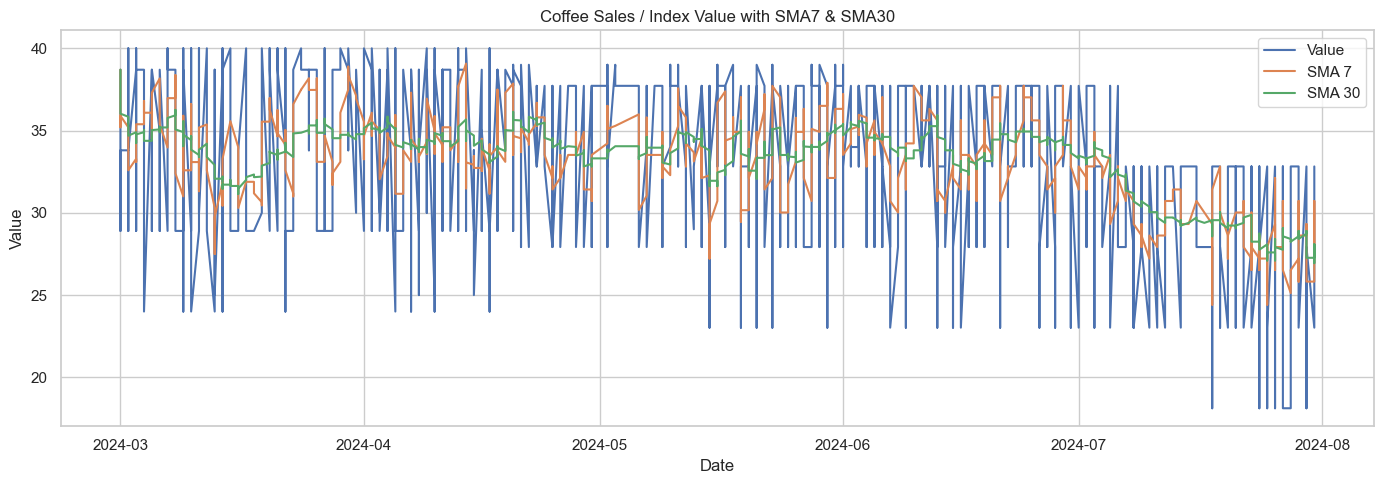

Saved: C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs\figures\fig_price_sma.png


In [5]:
# CELL 5: Price + SMAs plot
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Value'], label='Value')
plt.plot(df['Date'], df['SMA_7'], label='SMA 7')
plt.plot(df['Date'], df['SMA_30'], label='SMA 30')
plt.legend()
plt.title("Coffee Sales / Index Value with SMA7 & SMA30")
plt.xlabel("Date")
plt.ylabel("Value")
plt.tight_layout()
path = os.path.join(FIG, "fig_price_sma.png")
plt.savefig(path, dpi=300)
plt.show()
print("Saved:", path)


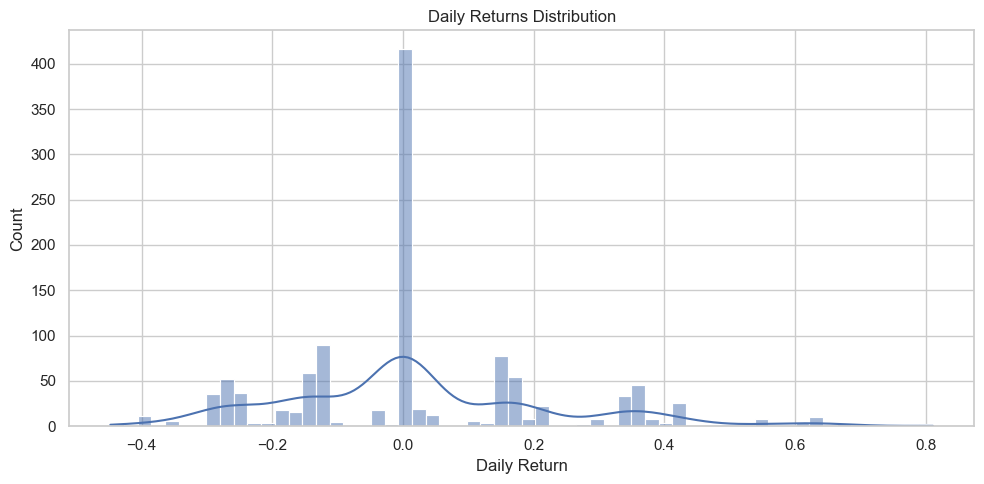

Saved: C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs\figures\fig_returns_hist.png


In [6]:
# CELL 6: returns distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Return'].dropna(), bins=60, kde=True)
plt.title("Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.tight_layout()
path = os.path.join(FIG, "fig_returns_hist.png")
plt.savefig(path, dpi=300)
plt.show()
print("Saved:", path)


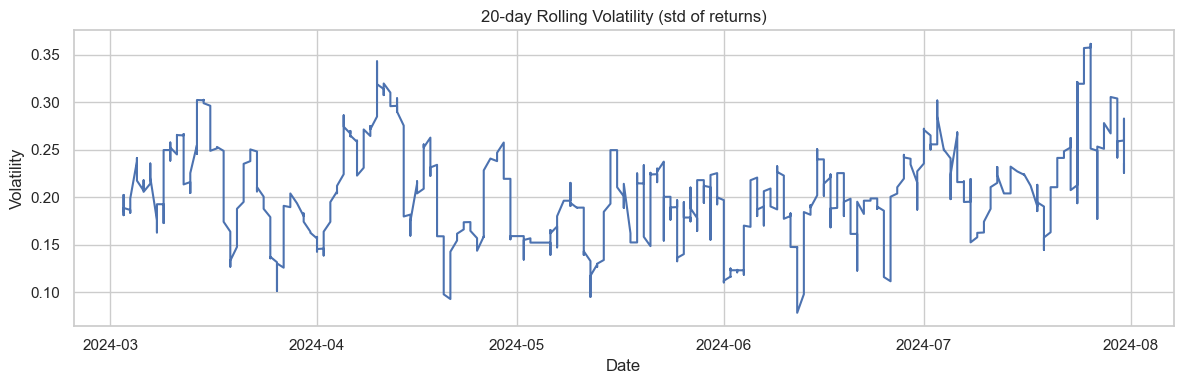

Saved: C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs\figures\fig_volatility.png


In [7]:
# CELL 7: rolling volatility
df['Vol_20'] = df['Return'].rolling(window=20).std()
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Vol_20'])
plt.title("20-day Rolling Volatility (std of returns)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
path = os.path.join(FIG, "fig_volatility.png")
plt.savefig(path, dpi=300)
plt.show()
print("Saved:", path)


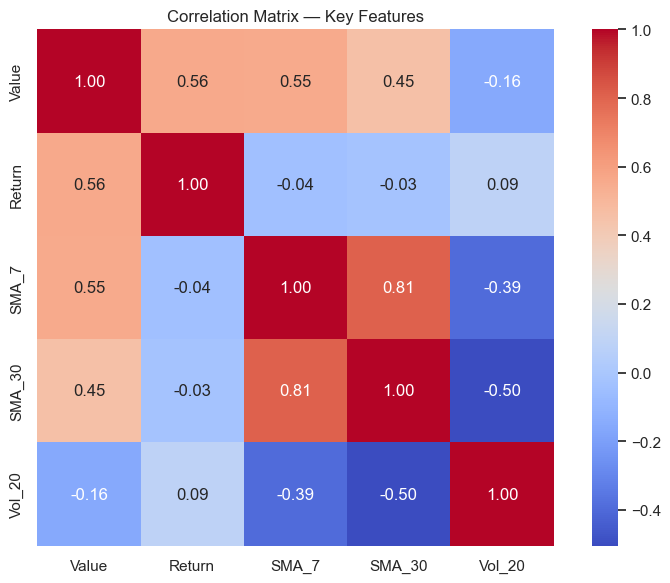

Saved: C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs\figures\fig_corr.png


In [8]:
# CELL 8: correlation heatmap
cols_for_corr = ['Value','Return','SMA_7','SMA_30','Vol_20']
corr = df[cols_for_corr].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix — Key Features")
plt.tight_layout()
path = os.path.join(FIG, "fig_corr.png")
plt.savefig(path, dpi=300)
plt.show()
print("Saved:", path)


In [11]:
import os

BASE = r"C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales"   # adjust if different
OUT = os.path.join(BASE, "outputs")
FIG = os.path.join(OUT, "figures")
os.makedirs(FIG, exist_ok=True)
print("Figures dir:", FIG)


Figures dir: C:\Users\amins\OneDrive\Desktop\Unified Mentor\Coffee Sales\outputs\figures


In [12]:
# replace df with your dataframe variable name (likely `df`)
df.columns.tolist(), df.dtypes, df.head(3)


(['Date',
  'datetime',
  'cash_type',
  'card',
  'Value',
  'coffee_name',
  'Return',
  'SMA_7',
  'SMA_30',
  'Vol_20'],
 Date           datetime64[ns]
 datetime               object
 cash_type              object
 card                   object
 Value                 float64
 coffee_name            object
 Return                float64
 SMA_7                 float64
 SMA_30                float64
 Vol_20                float64
 dtype: object,
         Date                 datetime cash_type                 card  Value  \
 0 2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
 1 2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
 2 2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
 
      coffee_name  Return  SMA_7  SMA_30  Vol_20  
 0          Latte     NaN   38.7    38.7     NaN  
 1  Hot Chocolate     0.0   38.7    38.7     NaN  
 2  Hot Chocolate     0.0   38.7    38.7     NaN  )

In [13]:
Date, datetime, cash_type, card, money, coffee_name


NameError: name 'Date' is not defined

In [14]:
df['money'] = pd.to_numeric(df['money'], errors='coerce')   # non-numeric -> NaN
print("money nulls:", df['money'].isna().sum(), " / ", len(df))
# optional: fill NaNs (depends on your choice). If NaNs small, drop those rows for indicator calc:
df = df.dropna(subset=['money']).reset_index(drop=True)


KeyError: 'money'

In [15]:
from ta.momentum import RSIIndicator
import numpy as np

price_col = 'sales' if 'sales' in df.columns else 'money'
print("Using price column:", price_col)

# ensure enough length
if df.shape[0] < 20:
    raise ValueError("Not enough rows to compute RSI/rolling indicators")

# compute RSI via ta (preferred)
try:
    df['RSI_14'] = RSIIndicator(df[price_col], window=14).rsi()
except Exception as e:
    # fallback simple implementation
    price = df[price_col]
    delta = price.diff()
    up = delta.clip(lower=0).rolling(14).mean()
    down = (-delta.clip(upper=0)).rolling(14).mean()
    rs = up / down
    df['RSI_14'] = 100 - (100 / (1 + rs))

df['RSI_14'] = df['RSI_14'].fillna(method='bfill').fillna(method='ffill')
print("RSI computed, nulls:", df['RSI_14'].isna().sum())


Using price column: money


KeyError: 'money'